<div class="alert alert-info"> <b>Ссылка на презентацию:</b> https://disk.yandex.ru/d/eR3Nl7qwGWSWxg
</div>

<div class="alert alert-info"> <b>Ссылка на дашборд:</b> https://public.tableau.com/views/_16944748109720/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link
</div>

# Анализ оттока клиентов «Метанпромбанк»

## Цели, задачи и описание данных проекта

Цель: выявить причины оттока клиентов «Метанпромбанк» и дать рекомендации по их удержанию.

Задачи:

    1. Проверка и подготовка предоставленных данных:
        - Проверка типа данных в столбцах;
        - Проверка пропущенных значений в столбцах, при необходимости их обработка;
        - Проверка на явные и неявные дубликаты, при необходимости их замена или исключение;
        - При необходимости добавление новых столбцов для удобства анализа.
        
    2. Анализ данных:
        - Анализ распределения признаков;
        - Анализ портретов клиентов банка;
        - Анализ дополнительных признаков, которые будут определены в ходе обработки данных.
        
    3. Составление и проверка гипотез по оттоку клиентов.
    
    4. Формирование рекомендаций по снижению оттока клиентов.

Описание данных:
 - userid — идентификатор пользователя,
 - score — баллы кредитного скоринга,
 - City — город,
 - Gender — пол,
 - Age — возраст,
 - Equity — количество баллов собственности,
 - Balance — баланс на счёте,
 - Products — количество продуктов, которыми пользуется клиент,
 - CreditCard — есть ли кредитная карта,
 - Last_activity — активный клиент,
 - estimated_salary — заработная плата клиента,
 - Churn — ушёл или нет.

## Проверка и подготовка данных к анализу

In [1]:
#Импорт библиотек
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy import stats as st
import math as mth
from plotly import graph_objects as go
import statistics
from scipy.stats import skew, mode

In [2]:
data=pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
data.head()

In [62]:
data.to_csv('bank_scrooge.csv')

### Проверка типа данных в столбцах

In [3]:
#Проверка типа данных и проверка пропущенных значений в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Все данные соответствуют своему типу

In [4]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Существуют данные, в которых у клиентов нет ни одного продукта в банке. Необходимо проверить эти строки.

In [5]:
#выввод строк, где у клиента нет ни одного продукта в банке
data[data['products']==0]

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Здесь всего одна строка и она не является показательной, ее можно удалить.

In [6]:
#удаление строки, где у клиента нет ни одного продукта в банке
data=data[data['products']!=0]

### Проверка на явные дубликаты и неявные дубликаты

In [7]:
#Проверка на явные дубликаты
data.duplicated().sum()

0

Полностью дублирующих строк в датасете нет

In [8]:
#Проверка на неявные дубликаты по номеру клиента
data['USERID'].duplicated(keep=False).sum()

146

Обнаружено 146 строк, где есть неявные дубликаты по номеру клиенту, необходимо проверить эти данные

In [9]:
user=data[data['USERID'].duplicated(keep=False)]
user=user.sort_values(by='USERID',ascending=False)
user.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0


In [10]:
user['city'].sort_values().unique()

array(['Рыбинск', 'Ярославль'], dtype=object)

По данным видно, что записи по одному клиенту различаются по городам (это Рыбинск и Ярославль), также у некоторых пользователей видно, что меняется количество продуктов. Возможно, данные клиента переезжали и становились клиентами банка в другом городе. В таком случае данные удалять не стоит, будем использовать их в анализе.

Также сделаем проверку по столбцам, где значения должны быть уникальными

In [11]:
#Проверка на неявные дубликаты по городам
data['city'].sort_values().unique()

array(['Ростов', 'Рыбинск', 'Ярославль'], dtype=object)

In [12]:
#Проверка на неявные дубликаты по полу
data['gender'].sort_values().unique()

array(['Ж', 'М'], dtype=object)

In [13]:
#Проверка на неявные дубликаты по возрасту
data['age'].sort_values().unique()

array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 86., nan])

In [14]:
#Проверка на неявные дубликаты по количеству баллов собственности
data['equity'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
#Проверка на неявные дубликаты по количеству продуктов
data['products'].sort_values().unique()

array([1, 2, 3, 4, 5])

In [16]:
#Проверка на неявные дубликаты по наличию кредитной карты
data['credit_card'].sort_values().unique()

array([0, 1])

In [17]:
#Проверка на неявные дубликаты по признаку активного клиента
data['last_activity'].sort_values().unique()

array([0, 1])

In [18]:
#Проверка на неявные дубликаты по признаку того, что ушел клиент или нет
data['churn'].sort_values().unique()

array([0, 1])

Неявных дубликатов по столбцам не обнаружено

### Проверка пропущенных значений в столбцах

In [19]:
#проверка пропущенных значений
data.isna().mean()*100

USERID            0.000000
score             0.000000
city              0.000000
gender            0.000000
age               0.260026
equity            0.000000
balance          22.942294
products          0.000000
credit_card       0.000000
last_activity     0.000000
EST_SALARY        0.000000
churn             0.000000
dtype: float64

Обнаружены пропущенные значения в столбцах с возрастом (0.26%) и с балансом на счете (22.9%). Рассмотрим эти данные по отдельности.

In [20]:
#Заменим пропуски в возрасте на 0
data['age']=data['age'].fillna(0)

In [21]:
#Проверим количество строк, где возраст равен 0
age=data.query('age <= 0')
age['age'].count()

26

Так как таких строк меньше одного процента (0.26%), удалим эти данные

In [22]:
#Удаление строк, где возраст равен 0
data=data.query('age >= 1')

In [23]:
#Проверим строки, где есть пропущенные значение по балансу
data[data['balance'].isna()].describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,2278.000000,2278.000000,2278.000000,2278.000000,0.0,2278.000000,2278.000000,2278.000000,2.278000e+03,2278.000000
mean,171915.451273,865.314750,42.076822,0.050044,NaN,1.163740,0.815628,0.549166,2.264338e+05,0.005268
std,33306.706956,89.550489,11.919094,0.218083,NaN,0.403065,0.387873,0.497686,1.998249e+05,0.072404
min,114182.000000,642.000000,18.000000,0.000000,NaN,1.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,142986.750000,871.000000,33.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.202695e+05,0.000000
50%,172376.000000,903.000000,40.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.743542e+05,0.000000
75%,201258.500000,922.000000,49.000000,0.000000,NaN,1.000000,1.000000,1.000000,2.403970e+05,0.000000
max,229145.000000,990.000000,86.000000,1.000000,NaN,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [24]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,9973.000000,9973.000000,9973.000000,9973.000000,7.695000e+03,9973.000000,9973.000000,9973.000000,9.973000e+03,9973.000000
mean,171757.616966,848.671212,42.730773,2.630803,8.272456e+05,1.871653,0.680237,0.522912,1.477991e+05,0.182292
std,33696.365256,65.393153,12.175166,1.980060,1.980327e+06,0.792547,0.466408,0.499500,1.392871e+05,0.386105
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142757.000000,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.525202e+04,0.000000
50%,172651.000000,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.196431e+05,0.000000
75%,201164.000000,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.745000e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Если сравнивать пустые строки по балансу с общим массивом данных, то видно, что клиенты, где не заполнены данные по балансу, имеют следующие отличия:

- Более высокие баллы кредитного скорнига
- У них меньше баллов собственности
- Они имеют больше продуктов в банке

Для анализа пропущенных значений по балансу создадим столбец с признаком пропуска данного значения и построим сводную таблицу, чтобы найти взаимосвязи с другими данными.

In [25]:
#Создание нового столбца с признаком пропуска
def pass_balance(balance):
    if balance > 0:
        return 0
    else:
        return 1

data['balance_pass']=data['balance'].apply(pass_balance)
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,balance_pass
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


In [26]:
#Создание сводной таблицы для сравнения основных данных по пропущенным и непропущенным значениям
balance_pass=(data.groupby('balance_pass')
              .agg({'age':'mean','EST_SALARY':'mean','products':'median',
                    'equity':'median','city':[pd.Series.mode],'gender':[pd.Series.mode]})
              .round(1).T)
balance_pass=balance_pass.rename(columns = {0:'no_pass', 1:'pass'})
balance_pass

,balance_pass,no_pass,pass
age,mean,42.9,42.1
EST_SALARY,mean,124541.3,226273.9
products,median,2,1
equity,median,4,0
city,mode,Ярославль,Ярославль
gender,mode,Ж,М


У клиентов, с заполненым и незаполненым полем баланса, одинаковый средний возраст. Средняя зарплата, где пропущены значения, почти в 2 раза больше. Кол-во продуктов не сильно отличается, но по баллам собственности значительно уступают клиенты, где пропущены значения баланса.
Есть один признак, который объединяет их, это город Ярославль, возможно, были какие-то технические сбои в этом городе и поэтому данные пропущены. В любом случае, у нас нет возможности заполнить пропущенные значения корректно, поэтому оставим пропуски как есть.

### Кодирование данных

In [27]:
#Проверим возраст клиентов, которые покинули банк, чтобы определить возрастные категории
churn_1=data.query('churn==1')
age=(churn_1.pivot_table(index='age',values='USERID',aggfunc='count').sort_values(by='age').reset_index())
age=age.rename(columns={'USERID':'count'})

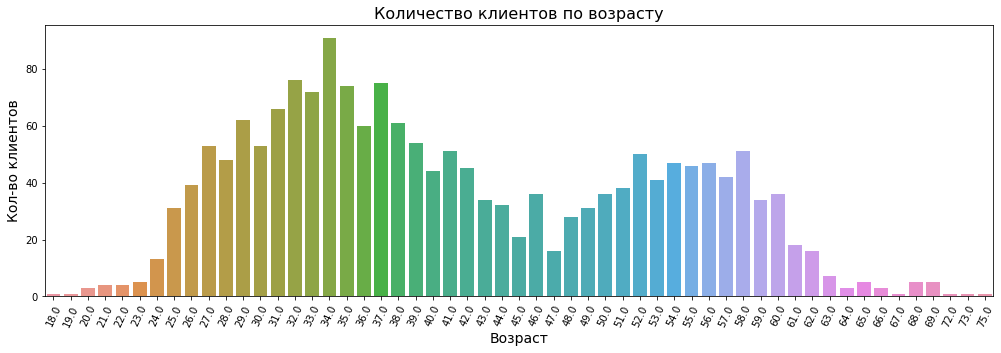

In [28]:
#Построим график по возрасту клиентов
plt.subplots(1,figsize=(17,5))
plt.xticks(rotation=65)
ax=sns.barplot(y='count',x='age',data=age) 
ax.axes.set_title('Количество клиентов по возрасту', fontsize=16)
ax.set_ylabel('Кол-во клиентов', fontsize=14)
ax.set_xlabel('Возраст', fontsize=14);

По графику видны возрастные категории клиентов; 18-24, 25-45, 46-62 и больше 63 лет.

In [29]:
#Создадим столбец с возрастной категорией, ориентируясь на визулизацию возраста клиентов
def age_segment(age):
    if 25 > age >= 18:
        return '18-24'
    if 45 >= age >= 25:
        return '25-45'
    if 62 >= age >= 46:
        return '46-62'
    if 63 <= age:
        return '63+' 
data['age_segment'] = data['age'].apply(age_segment)
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,balance_pass,age_segment
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,25-45
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,25-45
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,25-45
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,46-62
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,25-45


Для удобства дальнейшего анализа закодируем категориальные переменные.

In [30]:
#Кодирование переменных по возрастным категориям
data['age_segment2']=data['age_segment']
data=pd.get_dummies(data,columns =['age_segment2'])
data=data.rename(columns=({
    'age_segment2_18-24':'18-24','age_segment2_25-45':'25-45',
    'age_segment2_46-62':'46-62','age_segment2_63+':'63+'}))

In [31]:
#Кодирование переменных по гендеру
data['gender2']=data['gender']
data=pd.get_dummies(data,columns =['gender2'])
data=data.rename(columns=({
    'gender2_Ж':'Ж','gender2_М':'М'}))

In [32]:
#Кодирование переменных по городу
data['city2']=data['city']
data=pd.get_dummies(data,columns =['city2'])
data=data.rename(columns=({
    'city2_Рыбинск':'Рыбинск','city2_Ярославль':'Ярославль','city2_Ростов':'Ростов'}))
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,...,age_segment,18-24,25-45,46-62,63+,Ж,М,Ростов,Рыбинск,Ярославль
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,...,25-45,0,1,0,0,1,0,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,...,25-45,0,1,0,0,1,0,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,...,25-45,0,1,0,0,1,0,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,...,46-62,0,0,1,0,1,0,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,...,25-45,0,1,0,0,0,1,0,0,1


По проверке и подготовки данных были совершены следующие действия:
- Проверка типа данных
- Проверка и анализ пропущенных значений в столбцах
- Удалены строки, где у клиента нет ни одного продукта в банке и где не указан возраст клиента
- Проверка на явные и не явные дубликаты
- Определение возрастных категорий клиентов
- Кодирование категорильальных переменных (возраст, гендер, город)

## Анализ данных

### Анализ распределения признаков

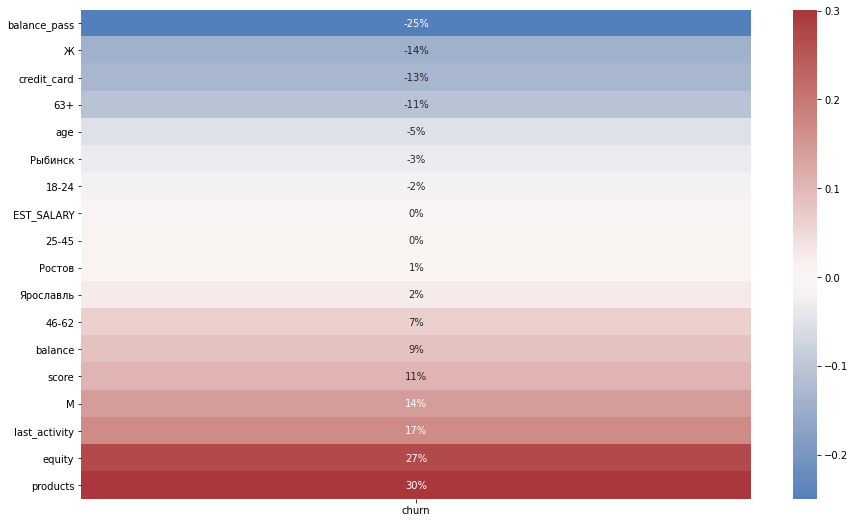

In [33]:
#вызовем метод corr(), чтобы найти коэффициент корреляции, и построим тепловую карту:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr().loc[:,['churn']].drop('churn').drop('USERID').sort_values('churn'),
            annot=True,fmt=".0%",center=0, cmap= 'vlag');

По тепловой карте видно, что наибольшая корреляция у следующих признаков:
- Количество продуктов
- Оценка собственности
- Последняя активность клиента
- Баллы кредитного скоринга
- Наличие кредитной карты
- Гендер
- Возраст

Чтобы определить сегменты клиентов, рассмотрим эти признаки подробнее

### Количество продуктов

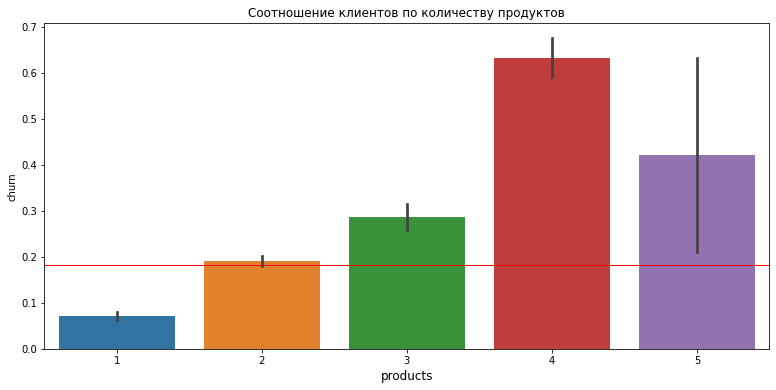

In [34]:
#Сделаем визуализацию по кол-ву продуктов
plt.figure(figsize=(13,6))
plt.title('Соотношение клиентов по количеству продуктов')
plt.xlabel('Кол-во продуктов', fontsize=12)
sns.barplot(data=data,y='churn',x='products')
plt.axhline(y=data['churn'].mean(), linewidth=1, color='r',zorder=1);

По графику видно, что большой отток клиентов, у которых более 3-х продуктов. Клиенты с 1-3 продуктами не показывают сильного оттока.

### Оценка собственности

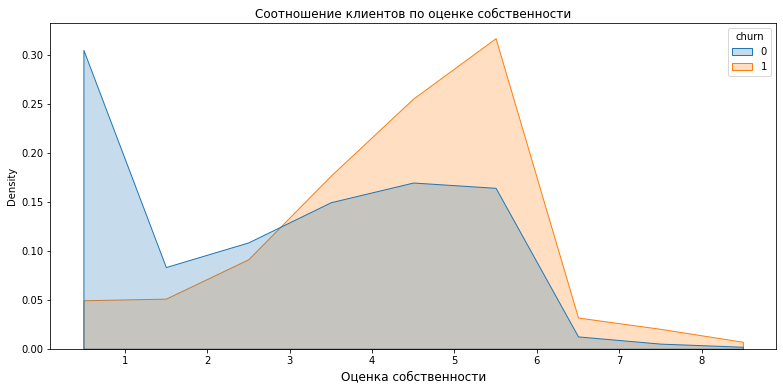

In [35]:
#Сделаем визуализацию по оценке собственности клиентов
plt.figure(figsize=(13,6))
plt.title('Соотношение клиентов по оценке собственности')
plt.xlabel('Оценка собственности', fontsize=12)
sns.histplot(data=data,hue='churn',x='equity',stat='density',common_norm=False,element='poly',bins=9);

По графику видно, что зависимость оттока клиентов начинается от оценки 3. Чем выше оценка собственности, тем больше отток.

### Последняя активность

In [36]:
#Ушедшие клиенты в % по последней активности
last_activity=(data.pivot_table(index='last_activity',values='churn',aggfunc=['sum','count']).reset_index())
last_activity.columns=last_activity.columns.droplevel(level=1)
last_activity=last_activity.rename(columns={'sum':'churn','count':'all'})
last_activity['share']=round((last_activity['churn']/last_activity['all']),3)*100
last_activity=last_activity.sort_values(by='share',ascending=False)

#Переименуем 1 и 0 на активный/неактивный клиент
def name_last_activity(last_activity):
    if last_activity == 1:
        return 'Активный клиент'
    else:
        return 'Неактивный клиент'
last_activity['last_activity']=last_activity['last_activity'].apply(name_last_activity)

last_activity

,last_activity,churn,all,share
1,Активный клиент,1277,5215,24.5
0,Неактивный клиент,541,4758,11.4


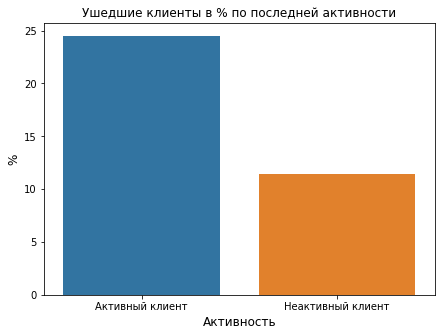

In [37]:
#Сделаем визуализацию ушедших клиентов по кол-ву продуктов
plt.figure(figsize=(7,5))
sns.barplot(x='last_activity',y='share',data=last_activity)
plt.title('Ушедшие клиенты в % по последней активности')
plt.xlabel('Активность', fontsize=12)
plt.ylabel('%',fontsize=12);

Здесь видно, что у активных клиентов отток высокий. Возможно, это связано, что активное использование услуг банков несет негативный опыт клиентам.

### Баллы кредитного скоринга

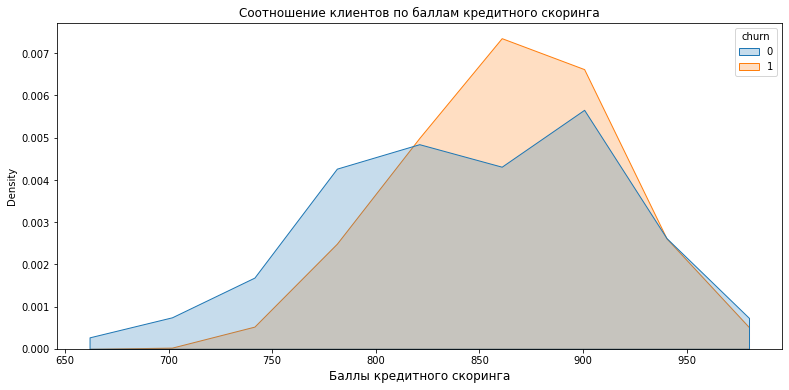

In [38]:
#Сделаем визуализацию по баллам кредитного скоринга клиентов
plt.figure(figsize=(13,6))
plt.title('Соотношение клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга', fontsize=12)
sns.histplot(data=data,hue='churn',x='score',stat='density',common_norm=False,element='poly',bins=9);

Больше всего клиентов ушло с баллами кредитного скоринга между 820 и 925 баллами.

### Наличие кредитной карты

In [39]:
#Ушедшие клиенты в % по наличию кредитной карты
credit=(data.pivot_table(index='credit_card',values='churn',aggfunc=['sum','count']).reset_index())
credit.columns=credit.columns.droplevel(level=1)
credit=credit.rename(columns={'sum':'churn','count':'all'})
credit['share']=round((credit['churn']/credit['all']),3)*100
credit=credit.sort_values(by='share',ascending=False)

#Переименуем 1 и 0 на есть/нет кредитной карты
def name_credit(credit_card):
    if credit_card == 1:
        return 'Есть кредитная карта'
    else:
        return 'Нет кредитной карты'
credit['credit_card']=credit['credit_card'].apply(name_credit)
credit

,credit_card,churn,all,share
0,Нет кредитной карты,815,3189,25.6
1,Есть кредитная карта,1003,6784,14.8


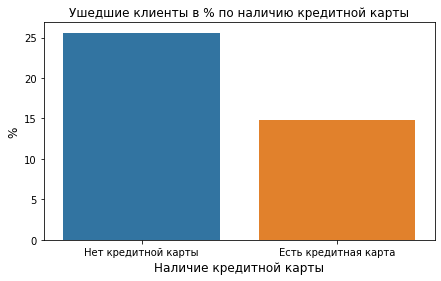

In [40]:
#Сделаем визуализацию по наличию кредитной карты
plt.figure(figsize=(7,4))
sns.barplot(x='credit_card',y='share',data=credit)
plt.title('Ушедшие клиенты в % по наличию кредитной карты')
plt.xlabel('Наличие кредитной карты', fontsize=12)
plt.ylabel('%',fontsize=12);

По данному графику видно, что клиенты, у которых не было кредитной карты, ушло почти в два раза больше, чем тех, которые использовали кредитную карту.

### Гендер

In [41]:
#Ушедшие клиенты в % по гендеру
gender=(data.pivot_table(index='gender',values='churn',aggfunc=['sum','count']).reset_index())
gender.columns=gender.columns.droplevel(level=1)
gender=gender.rename(columns={'sum':'churn','count':'all'})
gender['share']=round((gender['churn']/gender['all']),3)*100
gender=gender.sort_values(by='share',ascending=False)
gender

,gender,churn,all,share
1,М,1183,4991,23.7
0,Ж,635,4982,12.7


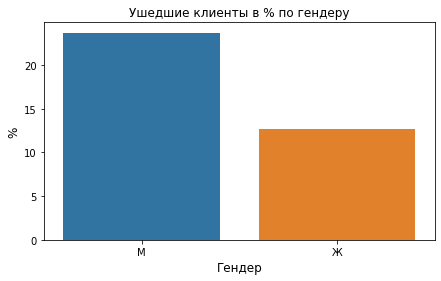

In [42]:
#Сделаем визуализацию по гендеру клиента
plt.figure(figsize=(7,4))
sns.barplot(x='gender',y='share',data=gender)
plt.title('Ушедшие клиенты в % по гендеру')
plt.xlabel('Гендер', fontsize=12)
plt.ylabel('%',fontsize=12);

По графику видно, что доля оттока у мужчин почти в два раза больше, чем у женщин.

### Возрастные категории

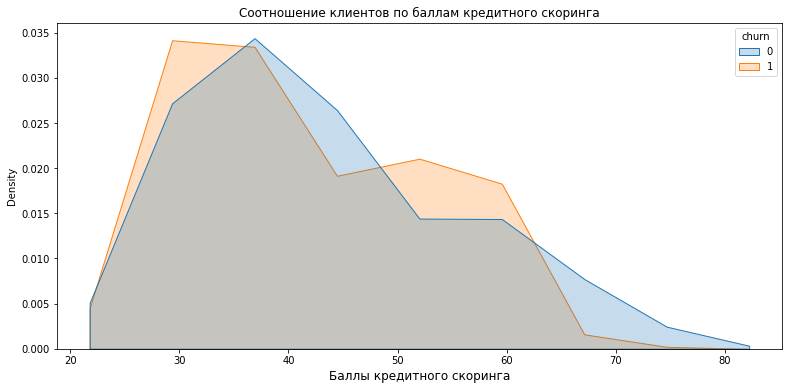

In [43]:
#Сделаем визуализацию клиентов по возрастным категориям
plt.figure(figsize=(13,6))
plt.title('Соотношение клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга', fontsize=12)
sns.histplot(data=data,hue='churn',x='age',stat='density',common_norm=False,element='poly',bins=9);

По гарфику видно, что меньший отток у клиентов старше 63. Самыми отточными является категория 48-62 года, а также 25-35 лет.

### Сводная информация по портрету клиента

In [44]:
#Создание сводной таблицы для сравнения портрета клиента
client=(data.groupby('churn')
            .agg({'age':'mean','EST_SALARY':'mean','score':'mean','products':'median',
                  'equity':'median','city':[pd.Series.mode],'gender':[pd.Series.mode]})
            .round(1).T)
client=client.rename(columns = {0:'no_churn', 1:'churn'})
client

,churn,no_churn,churn
age,mean,43.0,41.4
EST_SALARY,mean,147674.6,148357.5
score,mean,845.4,863.4
products,median,2,2
equity,median,3,4
city,mode,Ярославль,Ярославль
gender,mode,Ж,М


Данная сводная таблица показывает сравнение ушедших и не ушедших клиентов.
Как выяснили ранее, большая часть отточных клентов это мужчины, баллы кредитного скоринга 863 входят в диапозон выявленный ранее. Также совпадает оценка собственности (4).

По анализу данных выделим основные признаки отточных клиентов:
- Количество продуктов более 3-х
- Оценка собственности от 3, чем выше оценка собственности, тем больше отток.
- Высокий отток у активных клиетов
- Баллы кредитного скоринга между 820 и 925
- Отсутствие кредитной карты
- Большой отток составляют мужчины
- Возраст 48-62 года, а также 25-35 лет.

По данным признакам составим портреты клиентов.


## Портреты клиентов банка

### Портрет 1

- ***Количество продуктов:*** от 3 и более
- ***Остальные признаки:*** без ограничений

In [45]:
#Составление портрета клиента 1
portrait1=data.query('products>= 3')
#Расчет численности клиентов сегмента:
print ('Численность клиентов портрета 1:',portrait1['USERID'].count())
#Расчет численности ушедших клиентов сегмента
print ('Численность ушедших клиентов портрета 1:',portrait1['churn'].sum())
#Расчет доли ушедших клиентов сегмента
print ('Доля ушедших клиентов портрета 1:',round(portrait1['churn'].sum()/portrait1['USERID'].count(),3)*100,'%')

Численность клиентов портрета 1: 1531
Численность ушедших клиентов портрета 1: 605
Доля ушедших клиентов портрета 1: 39.5 %


### Портрет 2

- ***Возраст:*** 48-62
- ***Остальные признаки:*** без ограничений

In [46]:
#Составление портрета клиента 2
portrait2=data.query('age>48 and age<= 62')
#Расчет численности клиентов портрета 2:
print ('Численность клиентов портрета 2:',portrait2['USERID'].count())
#Расчет численности ушедших клиентов портрета 2
print ('Численность ушедших клиентов портрета 2:',portrait2['churn'].sum())
#Расчет доли ушедших клиентов портрета 2
print ('Доля ушедших клиентов портрета 2:',round(portrait2['churn'].sum()/portrait2['USERID'].count(),3)*100,'%')

Численность клиентов портрета 2: 2207
Численность ушедших клиентов портрета 2: 533
Доля ушедших клиентов портрета 2: 24.2 %


### Портрет 3

- ***Возраст:*** 25-35
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [47]:
#Составление портрета клиента 3
portrait3=data.query('age>25 and age<= 35 and last_activity==1')
#Расчет численности клиентов портрета 3:
print ('Численность клиентов портрета 3:',portrait3['USERID'].count())
#Расчет численности ушедших клиентов портрета 3
print ('Численность ушедших клиентов портрета 3:',portrait3['churn'].sum())
#Расчет доли ушедших клиентов портрета 3
print ('Доля ушедших клиентов портрета 3:',round(portrait3['churn'].sum()/portrait3['USERID'].count(),2)*100,'%')

Численность клиентов портрета 3: 1578
Численность ушедших клиентов портрета 3: 503
Доля ушедших клиентов портрета 3: 32.0 %


### Портрет 4

- ***Гендер:*** М
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [48]:
#Составление портрета клиента 4
portrait4=data.query('М==1 and last_activity==1')
#Расчет численности клиентов портрета 4:
print ('Численность клиентов портрета 4:',portrait4['USERID'].count())
#Расчет численности ушедших клиентов портрета 4
print ('Численность ушедших клиентов портрета 4:',portrait4['churn'].sum())
#Расчет доли ушедших клиентов портрета 4
print ('Доля ушедших клиентов портрета 4:',round(portrait4['churn'].sum()/portrait4['USERID'].count(),3)*100,'%')

Численность клиентов портрета 4: 2577
Численность ушедших клиентов портрета 4: 771
Доля ушедших клиентов портрета 4: 29.9 %


### Портрет 5

- ***Наличие кредитной карты:*** Нет
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [49]:
#Составление портрета клиента 5
portrait5=data.query('credit_card==0 and last_activity==1')
#Расчет численности клиентов портрета 5:
print ('Численность клиентов портрета 5:',portrait5['USERID'].count())
#Расчет численности ушедших клиентов портрета 5
print ('Численность ушедших клиентов портрета 5:',portrait5['churn'].sum())
#Расчет доли ушедших клиентов портрета 5
print ('Доля ушедших клиентов портрета 5:',round(portrait5['churn'].sum()/portrait5['USERID'].count(),4)*100,'%')

Численность клиентов портрета 5: 1745
Численность ушедших клиентов портрета 5: 612
Доля ушедших клиентов портрета 5: 35.07 %


### Портрет 6

- ***Баллы кредитного скоринга:*** больше 820
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [50]:
#Составление портрета клиента 6
portrait6=data.query('last_activity==1 and score >= 820')
#Расчет численности клиентов портрета 6:
print ('Численность клиентов портрета 6:',portrait6['USERID'].count())
#Расчет численности ушедших клиентов портрета 6
print ('Численность ушедших клиентов портрета 6:',portrait6['churn'].sum())
#Расчет доли ушедших клиентов портрета 6
print ('Доля ушедших клиентов портрета 6:',round(portrait6['churn'].sum()/portrait6['USERID'].count(),3)*100,'%')

Численность клиентов портрета 6: 3386
Численность ушедших клиентов портрета 6: 1089
Доля ушедших клиентов портрета 6: 32.2 %


### Портрет 7

- ***Количество баллов собственности:*** от 3 и более
- ***Баллы кредитного скоринга:*** более 820
- ***Наличие кредитной карты:*** Нет
- ***Остальные признаки:*** без ограничений

In [51]:
#Составление портрета клиента 7
portrait7=data.query('score >= 820 and equity>=3 and credit_card==0')
#Расчет численности клиентов портрета 7:
print ('Численность клиентов портрета 7:',portrait7['USERID'].count())
#Расчет численности ушедших клиентов портрета 7
print ('Численность ушедших клиентов портрета 7:',portrait7['churn'].sum())
#Расчет доли ушедших клиентов портрета 7
print ('Доля ушедших клиентов портрета 7:',round(portrait7['churn'].sum()/portrait7['USERID'].count(),3)*100,'%')

Численность клиентов портрета 7: 1608
Численность ушедших клиентов портрета 7: 652
Доля ушедших клиентов портрета 7: 40.5 %


### Портрет 8

- ***Гендер:*** М
- ***Количество баллов собственности:*** от 3 и более
- ***Остальные признаки:*** без ограничений

In [52]:
#Составление портрета клиента 8
portrait8=data.query('equity>=3 and М==1')
#Расчет численности клиентов портрета 8:
print ('Численность клиентов портрета 8:',portrait8['USERID'].count())
#Расчет численности ушедших клиентов портрета 8
print ('Численность ушедших клиентов портрета 8:',portrait8['churn'].sum())
#Расчет доли ушедших клиентов портрета 8
print ('Доля ушедших клиентов портрета 8:',round(portrait8['churn'].sum()/portrait8['USERID'].count(),4)*100,'%')

Численность клиентов портрета 8: 2726
Численность ушедших клиентов портрета 8: 967
Доля ушедших клиентов портрета 8: 35.47 %


Выделены 8 портретов клиентов основанные на признаках, которые больше всего описывают отточных клиентов. Далее проверим гипотезы и выявим какие показатели стратегически влияют на отток и сделаем сегментацию на основе этих показателей и портретов клиентов.

## Составление и проверка гипотез по оттоку клиентов

### Проверка гипотезы статистической разницы по количеству продуктов

**Для проверки статистической разницы между выборками определим гипотезы:**

- H_0: Между клиентами, которые остались и которые ушли, нет разницы по количеству продуктов
- Н_1: Между клиентами, которые остались и которые ушли, есть разница по количеству продуктов

alpha = 0.05 (уровень статистической значимости)

In [53]:
#проверка гипотезы по влиянию оценки собственности на отток клиентов
test=st.ttest_ind(
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'],equal_var=False)

#уровень статистической значимости
alpha = 0.05

print (test.pvalue) 
if test.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку')
else:
    print ('Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку')

1.2671065900765871e-138
Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку


Проверка гипотезы подтвердила сделанные ранее выводы, что оценка собственности влияет на отток клиентов.

### Проверка гипотезы статистической разницы по баллам собственности

**Для проверки статистической разницы между выборками определим гипотезы:**

- H_0: Между клиентами, которые остались и которые ушли, нет разницы по баллам собственности
- Н_1: Между клиентами, которые остались и которые ушли, есть разница по баллам собственности

alpha = 0.05 (уровень статистической значимости)

In [54]:
#проверка гипотезы по влиянию оценки собственности на отток клиентов
test=st.ttest_ind(
    data[data['churn']==0]['equity'],
    data[data['churn']==1]['equity'],equal_var=False)

#уровень статистической значимости
alpha = 0.05

print (test.pvalue) 
if test.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку')
else:
    print ('Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку')

2.2265321241808214e-196
Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку


Также видно, что между клиентами, которые остались и которые ушли, есть разница по баллам собственности.

### Проверка гипотезы статистической разницы по наличию кредитной карты

**Для проверки статистической разницы между выборками определим гипотезы:**

- H_0: Между клиентами, которые остались и которые ушли, нет разницы по наличию кредитной карты
- Н_1: Между клиентами, которые остались и которые ушли, есть разница по наличию кредитной карты

alpha = 0.05 (уровень статистической значимости)

In [55]:
#проверка гипотезы по влиянию оценки собственности на отток клиентов
test=st.ttest_ind(
    data[data['churn']==0]['credit_card'],
    data[data['churn']==1]['credit_card'],equal_var=False)

#уровень статистической значимости
alpha = 0.05

print (test.pvalue) 
if test.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку')
else:
    print ('Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку')

3.5339185146511654e-34
Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку


Отсутсвие кредитной карты также влияет на отток клиентов.

### Проверка гипотезы статистической разницы по баллам кредитного скоринга

**Для проверки статистической разницы между выборками определим гипотезы:**

- H_0: Между клиентами, которые остались и которые ушли, нет разницы по баллам кредитного скоринга
- Н_1: Между клиентами, которые остались и которые ушли, есть разница по баллам кредитного скоринга

alpha = 0.05 (уровень статистической значимости)

In [56]:
#проверка гипотезы по влиянию оценки собственности на отток клиентов
test=st.ttest_ind(
    data[data['churn']==0]['score'],
    data[data['churn']==1]['score'],equal_var=False)

#уровень статистической значимости
alpha = 0.05

print (test.pvalue) 
if test.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку')
else:
    print ('Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку')

1.3179430198200596e-37
Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку


Между клиентами, которые остались и которые ушли, есть разница по баллам кредитного скоринга.

### Проверка гипотезы статистической разницы по заработной плате

**Для проверки статистической разницы между выборками определим гипотезы:**

- H_0: Между клиентами, которые остались и которые ушли, нет разницы по заработной плате
- Н_1: Между клиентами, которые остались и которые ушли, есть разница по заработной плате

alpha = 0.05 (уровень статистической значимости)

In [57]:
#проверка гипотезы по влиянию оценки собственности на отток клиентов
test=st.ttest_ind(
    data[data['churn']==0]['EST_SALARY'],
    data[data['churn']==1]['EST_SALARY'],equal_var=False)

#уровень статистической значимости
alpha = 0.05

print (test.pvalue) 
if test.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу: между клиентами есть разница по данному признаку')
else:
    print ('Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку')

0.8354803526840116
Не получилось отвергнуть нулевую гипотезу: между клиентами нет разницы по данному признаку


Данная проверка показывает, что заработная плата клиентов не влияет на их отток.

Проверка сформированных гипотез подвердила раннее проанализированные признаки.

Выделены показатели, которые влияют на отток:
- Количество продуктов в банке
- Баллы собственности
- Наличие кредитной карты
- Баллы кредитного скоринга

Данные показатели выделим как стратегически важные и сделаем на их основе сегментацию.

## Сегментация

На основе сформированных портретов клиентов и признаках, которые больше всего влияют на отток, определенны отточные сегменты. Сегменты расположены по приоритетам и по каждому сегменту даны рекомендации.

### Сегмент 1

- ***Баллы кредитного скоринга:*** больше 820
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [58]:
segment1=data.query('last_activity==1 and score >= 820')
#Расчет численности клиентов сегмента:
print ('Численность клиентов сегмента 1:',segment1['USERID'].count())
#Расчет численности ушедших клиентов сегмента
print ('Численность ушедших клиентов сегмента 1:',segment1['churn'].sum())
#Расчет доли ушедших клиентов сегмента
print ('Доля ушедших клиентов сегмента 1:',round(segment1['churn'].sum()/segment1['USERID'].count(),3)*100,'%')

Численность клиентов сегмента 1: 3386
Численность ушедших клиентов сегмента 1: 1089
Доля ушедших клиентов сегмента 1: 32.2 %


*Рекомендации для сегмента активных клиентов с хорошей кредитной историей:*
- Сделать предложение по кредитной карте/кредиту
- Предложить другие продукты банка с бонусами (скидки у партнеров, дополнительный кэшбек на основную карту).
- Предложить ипотечное кредитование.

### Сегмент 2

- ***Количество баллов собственности:*** от 3 и более
- ***Баллы кредитного скоринга:*** более 820
- ***Наличие кредитной карты:*** Нет
- ***Остальные признаки:*** без ограничений

In [59]:
segment2=data.query('score >= 820 and equity>=3 and credit_card==0')
#Расчет численности клиентов сегмента:
print ('Численность клиентов сегмента 2:',segment2['USERID'].count())
#Расчет численности ушедших клиентов сегмента
print ('Численность ушедших клиентов сегмента 2:',segment2['churn'].sum())
#Расчет доли ушедших клиентов сегмента
print ('Доля ушедших клиентов сегмента 2:',round(segment2['churn'].sum()/segment2['USERID'].count(),3)*100,'%')

Численность клиентов сегмента 2: 1608
Численность ушедших клиентов сегмента 2: 652
Доля ушедших клиентов сегмента 2: 40.5 %


*Рекомендации для сегмента клиентов с хорошей кредитной историей, высоким баллом собственности и без кредитной карты:*
- Сделать предложение по кредитной карте.
- Предложить услуги по страхованию недвижимости.
- Сделать предложения по использованию других продуктов банка.

### Сегмент 3

- ***Наличие кредитной карты:*** Нет
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [60]:
segment3=data.query('credit_card==0 and last_activity==1')
#Расчет численности клиентов сегмента:
print ('Численность клиентов сегмента 3:',segment3['USERID'].count())
#Расчет численности ушедших клиентов сегмента
print ('Численность ушедших клиентов сегмента 3:',segment3['churn'].sum())
#Расчет доли ушедших клиентов сегмента
print ('Доля ушедших клиентов сегмента 3:',round(segment3['churn'].sum()/segment3['USERID'].count(),4)*100,'%')

Численность клиентов сегмента 3: 1745
Численность ушедших клиентов сегмента 3: 612
Доля ушедших клиентов сегмента 3: 35.07 %


*Рекомендации для сегмента активных клиентов без кредитной карты:*
- Сделать предложение по кредитной карте.
- Предложить на выбор категории с повышенным кэшбеком за покупки с кредитной/дебетовой карты.
- Предложить использовать карту банка как зарплатную/пенсионную.

### Сегмент 4

- ***Гендер:*** М
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

In [61]:
segment4=data.query('М==1 and last_activity==1')
#Расчет численности клиентов сегмента:
print ('Численность клиентов сегмента 4:',segment4['USERID'].count())
#Расчет численности ушедших клиентов сегмента
print ('Численность ушедших клиентов сегмента 4:',segment4['churn'].sum())
#Расчет доли ушедших клиентов сегмента
print ('Доля ушедших клиентов сегмента 4:',round(segment4['churn'].sum()/segment4['USERID'].count(),3)*100,'%')

Численность клиентов сегмента 4: 2577
Численность ушедших клиентов сегмента 4: 771
Доля ушедших клиентов сегмента 4: 29.9 %


*Рекомендации для сегмента активных клиентов мужчин:*
- Сделать предложение по кредитной карте.
- Сделать ежемесяную подборку категорий с повышенным кэшбеком: спорт, охота, рыбалка, товары для строительства.
- Скидки на подключение льготных подписок на спортивные каналы.

## Вывод и рекомендации по сниженнию оттока клиентов

Был проведен анализ оттока клиентов «Метанпромбанк».
Анализ показал, что существуют показатели, которые формируют сегменты клиентов, которые уходят.

Показатели, которые влияют на отток клиентов:
- Количество продуктов: более 3-х
- Оценка собственности: от 3, чем выше оценка собственности, тем больше отток.
- Активность клиентов: высокий отток у активных клиетов
- Баллы кредитного скоринга: между 820 и 925
- Отсутствие кредитной карты
- Большой отток составляют мужчины
- Возраст 46-62 года, а также 25-45 лет.

Также был проведен статистический анализ по следующим гипотезам:

- **Гипотеза 1** Существует разница по количеству продуктов между клиентами, которые остались и которые ушли - **гипотеза подвердилась**.
- **Гипотеза 2** Существует разница по оценке собсввенности между клиентами, которые остались и которые ушли - **гипотеза подвердилась**.
- **Гипотеза 3** Существует разница по наличию кредитной карты между клиентами, которые остались и которые ушли - **гипотеза подвердилась**.
- **Гипотеза 4** Существует разница по баллам кредитного скоринга между клиентами, которые остались и которые ушли - **гипотеза подвердилась**.
- **Гипотеза 5** Существует разница по заработной плате между клиентами, которые остались и которые ушли - **гипотеза не подвердилась**.

Выделены показатели, которые влияют на отток:
- Количество продуктов в банке
- Баллы собственности
- Наличие кредитной карты
- Баллы кредитного скоринга

По данным показателям выделены отточные сегменты и по каждому ниже даны рекомендации. Сегменты указаны в приоритетном порядке.

**Сегмент 1**
- ***Баллы кредитного скоринга:*** больше 820
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

Численность клиентов сегмента 1: 3386

Численность ушедших клиентов сегмента 1: 1089

Доля ушедших клиентов сегмента 1: 32.2 %

*Рекомендации для сегмента активных клиентов с хорошей кредитной историей:*
- Сделать предложение по кредитной карте/кредиту
- Предложить другие продукты банка с бонусами (скидки у партнеров, дополнительный кэшбек на основную карту).
- Предложить ипотечное кредитование.

**Сегмент 2**
- ***Количество баллов собственности:*** от 3 и более
- ***Баллы кредитного скоринга:*** более 820
- ***Наличие кредитной карты:*** Нет
- ***Остальные признаки:*** без ограничений

Численность клиентов сегмента 2: 1608

Численность ушедших клиентов сегмента 2: 652

Доля ушедших клиентов сегмента 2: 40.5 %

*Рекомендации для сегмента клиентов с хорошей кредитной историей, высоким баллом собственности и без кредитной карты:*
- Сделать предложение по кредитной карте.
- Предложить услуги по страхованию недвижимости.
- Сделать предложения по использованию других продуктов банка.

**Сегмент 3**
- ***Наличие кредитной карты:*** Нет
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

Численность клиентов сегмента 3: 1745

Численность ушедших клиентов сегмента 3: 612

Доля ушедших клиентов сегмента 3: 35.07 %

*Рекомендации для сегмента активных клиентов без кредитной карты:*
- Сделать предложение по кредитной карте.
- Предложить на выбор категории с повышенным кэшбеком за покупки с кредитной/дебетовой карты.
- Предложить использовать карту банка как зарплатную/пенсионную.

**Сегмент 4**
- ***Гендер:*** М
- ***Активность клиента:*** Активный клиент
- ***Остальные признаки:*** без ограничений

Численность клиентов сегмента 4: 2577

Численность ушедших клиентов сегмента 4: 771

Доля ушедших клиентов сегмента 4: 29.9 %

*Рекомендации для сегмента активных клиентов мужчин:*
- Сделать предложение по кредитной карте.
- Сделать ежемесяную подборку категорий с повышенным кэшбеком: спорт, охота, рыбалка, товары для строительства.
- Скидки на подключение льготных подписок на спортивные каналы.